# DHFR

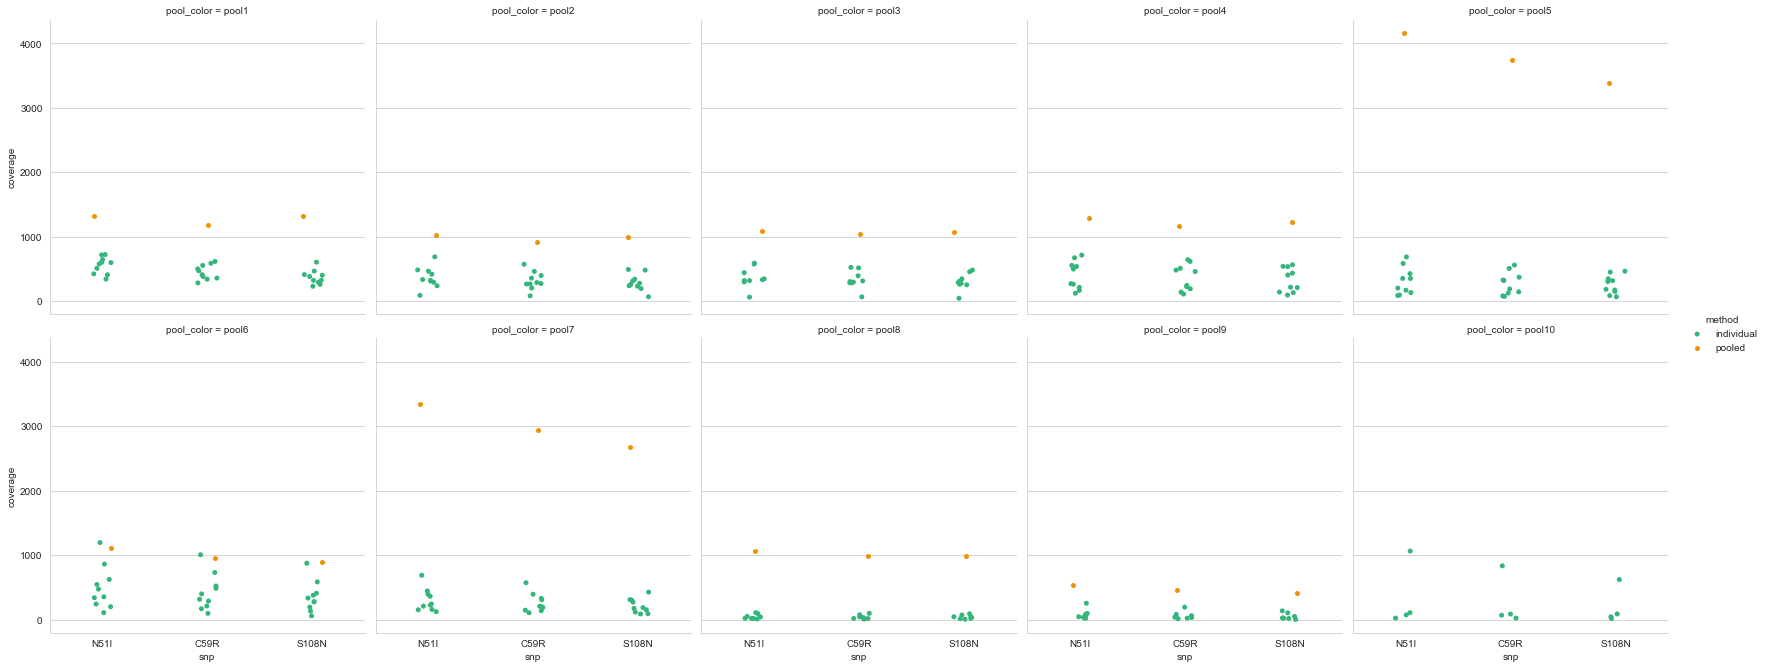

In [6]:
#Individual all SNPs for DHPS

import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None, "display.max_columns", None)


data = {'gene':[], 'coverage':[], 'snp':[], 'method':[], 'Sequences_name':[], 'pool_color':[]}

snp_dhfr_list = ['N51I', 'C59R', 'S108N']
snp_pos_list =[]
for i in range(len(snp_dhfr_list)):
    test_string = snp_dhfr_list[i]
    snp_position = ''.join(filter(lambda i: i.isdigit(), test_string))
    snp_pos_list.append(int(snp_position))
# print(snp_pos_list)  
    
samples_not_included =[]

cov_directory = r'/Users/mansi/Desktop/Haiti/Individual/Codon_coverage/PfDHFR/Coverage_results/avg_cov/'
for filename in os.listdir(cov_directory):
    if re.search(pattern = "^(avg)", string = filename):
        filepath = os.path.join(cov_directory, filename)
        sample_num = filename[4:10].split("P")[0]
#         print(sample_num)
    
        df_dhfr = pd.read_csv(filepath, sep="\t")
        df_codon_pos_list = list(df_dhfr.Codon_pos)
        for i in range(len(snp_dhfr_list)):
            test_string = snp_dhfr_list[i]
            snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
            df_snp_pos = snp_position - 1
            if df_snp_pos in df_codon_pos_list:
                cov_val = df_dhfr.at[df_snp_pos, "Codon_coverage"]
                data['coverage'].append(cov_val)
#                 data['sample'].append(sample_num)
                data['gene'].append('dhfr')
                data['method'].append('individual')
                data['snp'].append(test_string)
                data['Sequences_name'].append(sample_num)
                data['pool_color'].append("")
            else:
                samples_not_included.append(sample_num)

# print(data)

snp_df7 = pd.DataFrame(data)

df_ind_dhps3 = snp_df7

# Pooled all SNPs for DHPS

import os
import re
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)


data = {'gene':[], 'coverage':[], 'snp':[], 'method':[], 'Sequences_name':[], 'pool_color':[]}

snp_dhfr_list = ['N51I', 'C59R', 'S108N']
snp_pos_list =[]
for i in range(len(snp_dhfr_list)):
    test_string = snp_dhfr_list[i]
    snp_position = ''.join(filter(lambda i: i.isdigit(), test_string))
    snp_pos_list.append(int(snp_position))
# print(snp_pos_list)  
    
samples_not_included =[]

cov_directory = r'/Users/mansi/Desktop/Haiti/Pooled/Codon_coverage/PfDHFR/Coverage_results/avg_cov/'
for filename in os.listdir(cov_directory):
    if re.search(pattern = "^(avg)", string = filename):
        filepath = os.path.join(cov_directory, filename)
        sample_num = "pool"+str(filename[4:7])#.split("P")[0]
#         print(sample_num)
    
        temp_df_mdr1 = pd.read_csv(filepath, sep="\t")
        df_codon_pos_list = list(temp_df_mdr1.Codon_pos)
        for i in range(len(snp_dhfr_list)):
            test_string = snp_dhfr_list[i]
            snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
            df_snp_pos = snp_position - 1
            if df_snp_pos in df_codon_pos_list:
                cov_val = temp_df_mdr1.at[df_snp_pos, "Codon_coverage"]
                data['coverage'].append(cov_val)
#                 data['sample'].append(sample_num)
                data['gene'].append('dhfr')
                data['method'].append('pooled')
                data['snp'].append(test_string)
                data['Sequences_name'].append(sample_num)
                data['pool_color'].append("")
            else:
                samples_not_included.append(sample_num)



snp_df8 = pd.DataFrame(data)

df_pool_dhps3 = snp_df8

df_dhps_fin3 = df_ind_dhps3.append(df_pool_dhps3, ignore_index=True)


test_df3 = df_dhps_fin3.set_index('Sequences_name')

# Getting pool ids for each sample from PET excel sheet

import pandas as pd
path = r'/Users/mansi/Desktop/Haiti/Pass_Fail/Haiti_PetValues.xlsx'


df1 = pd.read_excel(path, sheet_name = "CovValidation")
# seq_name_list = list(df1.Sequences_name)

df1_drop = df1.drop(['SPECIES_CT', 'dhfr', 'mdr1', 'dhps', 'crt'], axis = 1)

df1_drop["Sequences_name"] = df1_drop["Sequences_name"].apply(str)

# Using different dfs to get the final df used for plotting
list1 = list(df1_drop.pool)

list2 = list(df1_drop.Sequences_name)

list3 = list(df_dhps_fin3.Sequences_name)



for item3 in list3:
    if item3 in list2:
        index = list2.index(item3)
#         print(item3, index, list1[index])
        test_df3.at[item3, "pool_color"] = list1[index]
    else:
        temp = item3.split("00")
        temp= [''.join(temp[0:2])] 
        n = str(temp).strip("['']")
        test_df3.at[item3, "pool_color"] = n

        
        
# test_sort3 = test_df3.sort_values(by=['pool_color'])
# test_sort3 = test_df3.sort_values(by=['snp'])

sns.set_style("whitegrid")
my_pal = {"pooled":"#ef9300", "individual":"#32b67a"}


g= sns.FacetGrid(test_df3, col = "pool_color", hue="method", col_order = ["pool1", "pool2","pool3","pool4","pool5","pool6","pool7","pool8","pool9", "pool10"], col_wrap = 5, palette = my_pal, height=4.7)
g.map(sns.stripplot, "snp", "coverage", order = ['N51I', 'C59R', 'S108N'])
g.add_legend()

plt.show()

outputfile = "/Users/mansi/Desktop/Haiti/Color_by_pool/dhfr-pool-grid.pdf"
g.fig.savefig(outputfile, bbox_inches='tight')


# MDR1

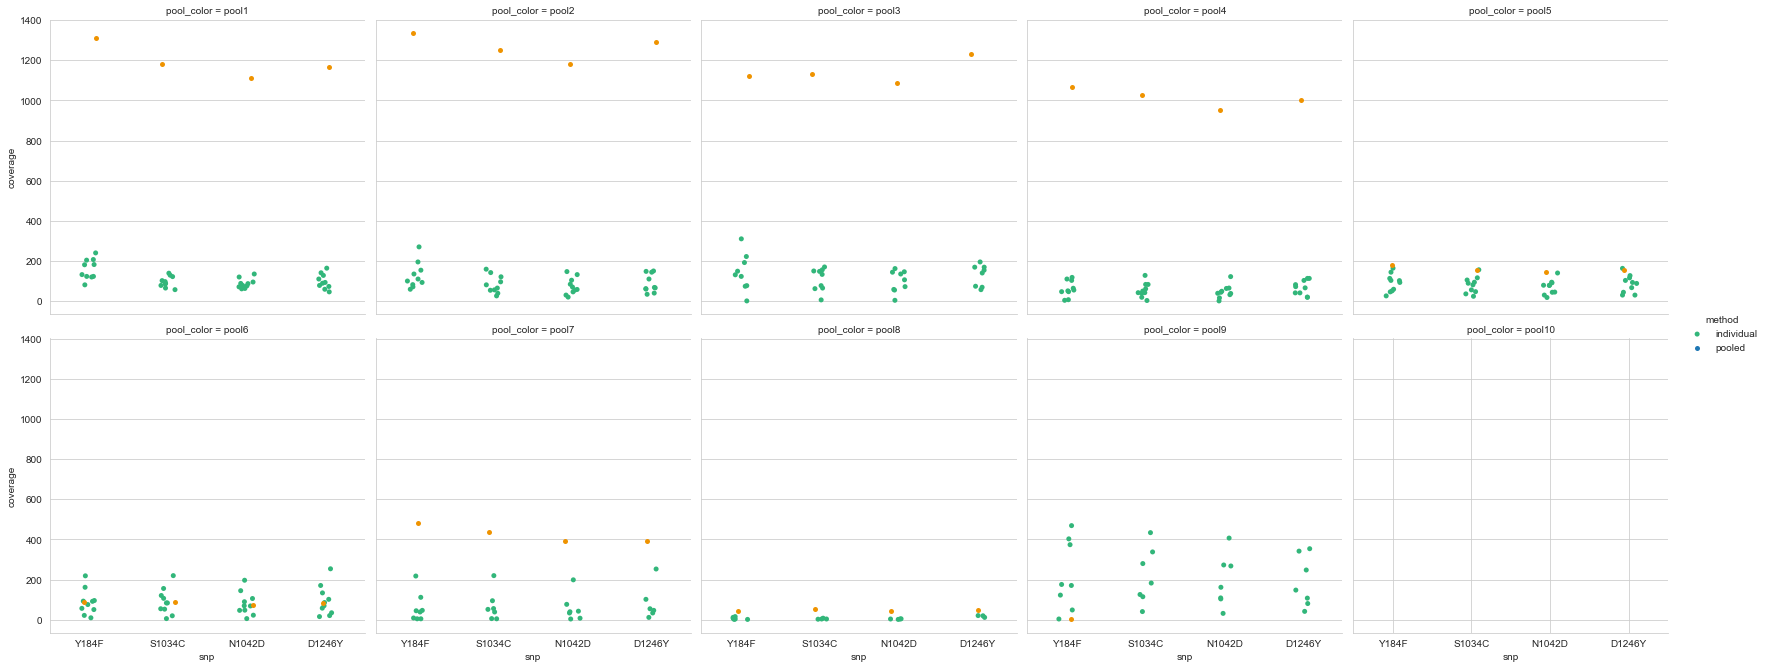

In [5]:
#Individual all SNPs for DHPS

import os
import re
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)


data = {'gene':[], 'coverage':[], 'snp':[], 'method':[], 'Sequences_name':[], 'pool_color':[]}

snp_dhfr_list = ['Y184F', 'S1034C', 'N1042D', 'D1246Y']
snp_pos_list =[]
for i in range(len(snp_dhfr_list)):
    test_string = snp_dhfr_list[i]
    snp_position = ''.join(filter(lambda i: i.isdigit(), test_string))
    snp_pos_list.append(int(snp_position))
# print(snp_pos_list)  
    
samples_not_included =[]

cov_directory = r'/Users/mansi/Desktop/Haiti/Individual/Codon_coverage/PfMDR1/Coverage_results/avg_cov/'
for filename in os.listdir(cov_directory):
    if re.search(pattern = "^(avg)", string = filename):
        filepath = os.path.join(cov_directory, filename)
        sample_num = filename[4:10].split("P")[0]
#         print(sample_num)
    
        df_dhfr = pd.read_csv(filepath, sep="\t")
        df_codon_pos_list = list(df_dhfr.Codon_pos)
        for i in range(len(snp_dhfr_list)):
            test_string = snp_dhfr_list[i]
            snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
            df_snp_pos = snp_position - 1
            if df_snp_pos in df_codon_pos_list:
                cov_val = df_dhfr.at[df_snp_pos, "Codon_coverage"]
                data['coverage'].append(cov_val)
#                 data['sample'].append(sample_num)
                data['gene'].append('mdr1')
                data['method'].append('individual')
                data['snp'].append(test_string)
                data['Sequences_name'].append(sample_num)
                data['pool_color'].append("")
            else:
                samples_not_included.append(sample_num)

# print(data)

snp_df7 = pd.DataFrame(data)

df_ind_dhps3 = snp_df7

# Pooled all SNPs for DHPS

import os
import re
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)


data = {'gene':[], 'coverage':[], 'snp':[], 'method':[], 'Sequences_name':[], 'pool_color':[]}

snp_dhfr_list = ['Y184F', 'S1034C', 'N1042D', 'D1246Y']
snp_pos_list =[]
for i in range(len(snp_dhfr_list)):
    test_string = snp_dhfr_list[i]
    snp_position = ''.join(filter(lambda i: i.isdigit(), test_string))
    snp_pos_list.append(int(snp_position))
# print(snp_pos_list)  
    
samples_not_included =[]

cov_directory = r'/Users/mansi/Desktop/Haiti/Pooled/Codon_coverage/PfMDR1/Coverage_results/avg_cov/'
for filename in os.listdir(cov_directory):
    if re.search(pattern = "^(avg)", string = filename):
        filepath = os.path.join(cov_directory, filename)
        sample_num = "pool"+str(filename[4:7])#.split("P")[0]
#         print(sample_num)
    
        temp_df_mdr1 = pd.read_csv(filepath, sep="\t")
        df_codon_pos_list = list(temp_df_mdr1.Codon_pos)
        for i in range(len(snp_dhfr_list)):
            test_string = snp_dhfr_list[i]
            snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
            df_snp_pos = snp_position - 1
            if df_snp_pos in df_codon_pos_list:
                cov_val = temp_df_mdr1.at[df_snp_pos, "Codon_coverage"]
                data['coverage'].append(cov_val)
#                 data['sample'].append(sample_num)
                data['gene'].append('dhps')
                data['method'].append('pooled')
                data['snp'].append(test_string)
                data['Sequences_name'].append(sample_num)
                data['pool_color'].append("")
            else:
                samples_not_included.append(sample_num)



snp_df8 = pd.DataFrame(data)

df_pool_dhps3 = snp_df8

df_dhps_fin3 = df_ind_dhps3.append(df_pool_dhps3, ignore_index=True)


test_df3 = df_dhps_fin3.set_index('Sequences_name')

# Getting pool ids for each sample from PET excel sheet

import pandas as pd
path = r'/Users/mansi/Desktop/Haiti/Pass_Fail/Haiti_PetValues.xlsx'


df1 = pd.read_excel(path, sheet_name = "CovValidation")
# seq_name_list = list(df1.Sequences_name)

df1_drop = df1.drop(['SPECIES_CT', 'dhfr', 'mdr1', 'dhps', 'crt'], axis = 1)

df1_drop["Sequences_name"] = df1_drop["Sequences_name"].apply(str)

# Using different dfs to get the final df used for plotting
list1 = list(df1_drop.pool)

list2 = list(df1_drop.Sequences_name)

list3 = list(df_dhps_fin3.Sequences_name)



for item3 in list3:
    if item3 in list2:
        index = list2.index(item3)
#         print(item3, index, list1[index])
        test_df3.at[item3, "pool_color"] = list1[index]
    else:
        temp = item3.split("00")
        temp= [''.join(temp[0:2])] 
        n = str(temp).strip("['']")
        test_df3.at[item3, "pool_color"] = n

        
        
# test_sort3 = test_df3.sort_values(by=['pool_color'])
# test_sort3 = test_df3.sort_values(by=['snp'])

sns.set_style("whitegrid")
my_pal = {"pooled":"#ef9300", "individual":"#32b67a"}


g= sns.FacetGrid(test_df3, col = "pool_color", hue="method", col_order = ["pool1", "pool2","pool3","pool4","pool5","pool6","pool7","pool8","pool9", "pool10"], col_wrap = 5, palette = my_pal, height=4.7)
g.map(sns.stripplot, "snp", "coverage", order = ['Y184F', 'S1034C', 'N1042D', 'D1246Y'])
g.add_legend()

plt.show()

outputfile = "/Users/mansi/Desktop/Haiti/Color_by_pool/mdr1-pool-grid.pdf"
g.fig.savefig(outputfile, bbox_inches='tight')

# DHPS

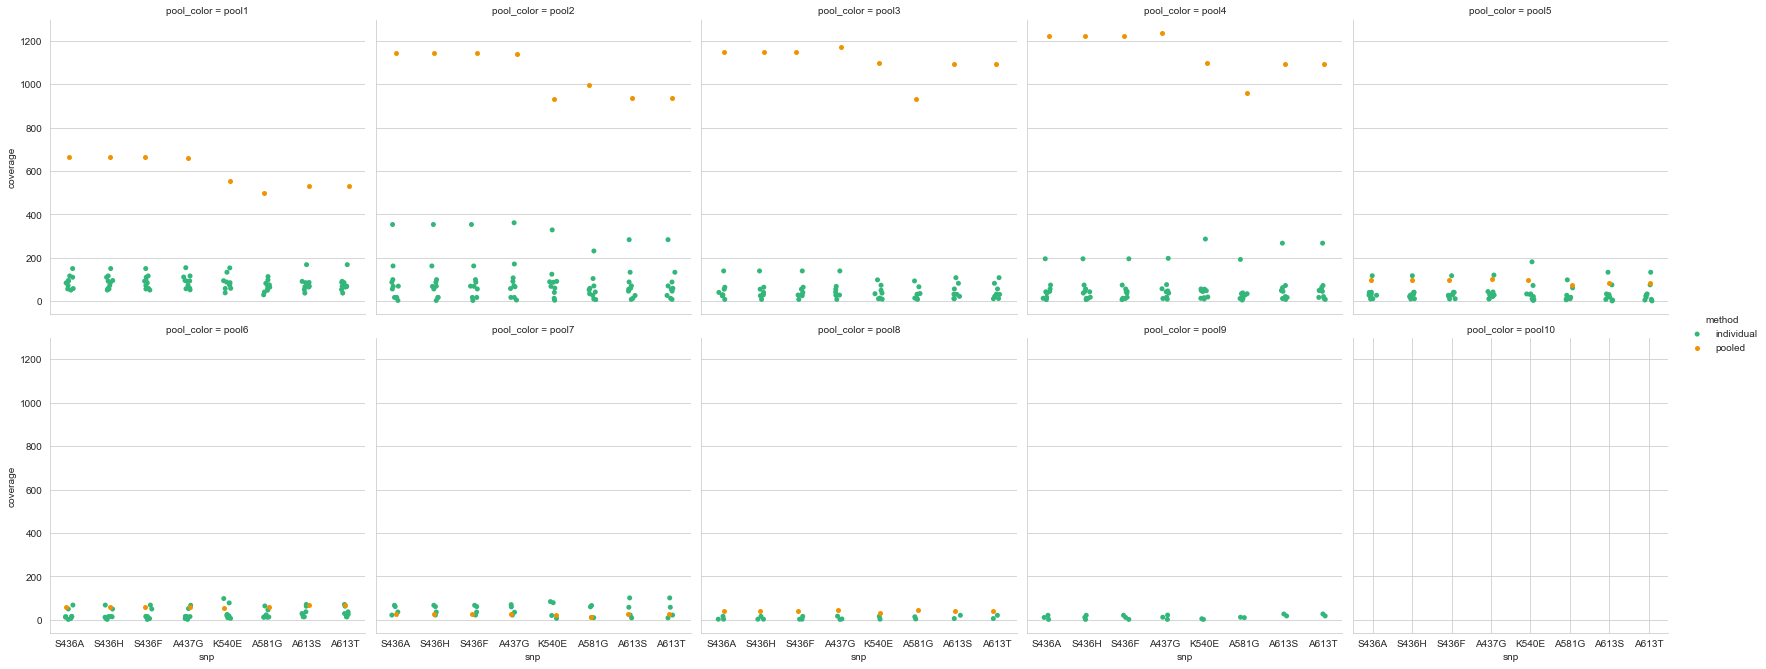

In [9]:
#Individual all SNPs for DHPS

import os
import re
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)


data = {'gene':[], 'coverage':[], 'snp':[], 'method':[], 'Sequences_name':[], 'pool_color':[]}

snp_dhfr_list = ['S436A', 'S436H', 'S436F', 'A437G', 'K540E', 'A581G', 'A613S', 'A613T']
snp_pos_list =[]
for i in range(len(snp_dhfr_list)):
    test_string = snp_dhfr_list[i]
    snp_position = ''.join(filter(lambda i: i.isdigit(), test_string))
    snp_pos_list.append(int(snp_position))
# print(snp_pos_list)  
    
samples_not_included =[]

cov_directory = r'/Users/mansi/Desktop/Haiti/Individual/Codon_coverage/PfDHPS/Coverage_results/avg_cov/'
for filename in os.listdir(cov_directory):
    if re.search(pattern = "^(avg)", string = filename):
        filepath = os.path.join(cov_directory, filename)
        sample_num = filename[4:10].split("P")[0]
#         print(sample_num)
    
        df_dhfr = pd.read_csv(filepath, sep="\t")
        df_codon_pos_list = list(df_dhfr.Codon_pos)
        for i in range(len(snp_dhfr_list)):
            test_string = snp_dhfr_list[i]
            snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
            df_snp_pos = snp_position - 1
            if df_snp_pos in df_codon_pos_list:
                cov_val = df_dhfr.at[df_snp_pos, "Codon_coverage"]
                data['coverage'].append(cov_val)
#                 data['sample'].append(sample_num)
                data['gene'].append('dhps')
                data['method'].append('individual')
                data['snp'].append(test_string)
                data['Sequences_name'].append(sample_num)
                data['pool_color'].append("")
            else:
                samples_not_included.append(sample_num)

# print(data)

snp_df7 = pd.DataFrame(data)

df_ind_dhps3 = snp_df7
# print(df_ind_dhps3)

# Pooled all SNPs for DHPS

import os
import re
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)


data = {'gene':[], 'coverage':[], 'snp':[], 'method':[], 'Sequences_name':[], 'pool_color':[]}

snp_dhfr_list = ['S436A', 'S436H', 'S436F', 'A437G', 'K540E', 'A581G', 'A613S', 'A613T']
snp_pos_list =[]
for i in range(len(snp_dhfr_list)):
    test_string = snp_dhfr_list[i]
    snp_position = ''.join(filter(lambda i: i.isdigit(), test_string))
    snp_pos_list.append(int(snp_position))
# print(snp_pos_list)  
    
samples_not_included =[]

cov_directory = r'/Users/mansi/Desktop/Haiti/Pooled/Codon_coverage/PfDHPS/Coverage_results/avg_cov/'
for filename in os.listdir(cov_directory):
    if re.search(pattern = "^(avg)", string = filename):
        filepath = os.path.join(cov_directory, filename)
        sample_num = "pool"+str(filename[4:7])#.split("P")[0]
#         print(sample_num)
    
        temp_df_mdr1 = pd.read_csv(filepath, sep="\t")
        df_codon_pos_list = list(temp_df_mdr1.Codon_pos)
        for i in range(len(snp_dhfr_list)):
            test_string = snp_dhfr_list[i]
            snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
            df_snp_pos = snp_position - 1
            if df_snp_pos in df_codon_pos_list:
                cov_val = temp_df_mdr1.at[df_snp_pos, "Codon_coverage"]
                data['coverage'].append(cov_val)
#                 data['sample'].append(sample_num)
                data['gene'].append('dhps')
                data['method'].append('pooled')
                data['snp'].append(test_string)
                data['Sequences_name'].append(sample_num)
                data['pool_color'].append("")
            else:
                samples_not_included.append(sample_num)



snp_df8 = pd.DataFrame(data)

df_pool_dhps3 = snp_df8

df_dhps_fin3 = df_ind_dhps3.append(df_pool_dhps3, ignore_index=True)


test_df3 = df_dhps_fin3.set_index('Sequences_name')

# Getting pool ids for each sample from PET excel sheet

import pandas as pd
path = r'/Users/mansi/Desktop/Haiti/Pass_Fail/Haiti_PetValues.xlsx'


df1 = pd.read_excel(path, sheet_name = "CovValidation")
# seq_name_list = list(df1.Sequences_name)

df1_drop = df1.drop(['SPECIES_CT', 'dhfr', 'mdr1', 'dhps', 'crt'], axis = 1)

df1_drop["Sequences_name"] = df1_drop["Sequences_name"].apply(str)

# Using different dfs to get the final df used for plotting
list1 = list(df1_drop.pool)

list2 = list(df1_drop.Sequences_name)

list3 = list(df_dhps_fin3.Sequences_name)



for item3 in list3:
    if item3 in list2:
        index = list2.index(item3)
#         print(item3, index, list1[index])
        test_df3.at[item3, "pool_color"] = list1[index]
    else:
        temp = item3.split("00")
        temp= [''.join(temp[0:2])] 
        n = str(temp).strip("['']")
        test_df3.at[item3, "pool_color"] = n

        
        
# test_sort3 = test_df3.sort_values(by=['pool_color'])
# test_sort3 = test_df3.sort_values(by=['snp'])


sns.set_style("whitegrid")
my_pal = {"pooled":"#ef9300", "individual":"#32b67a"}


g= sns.FacetGrid(test_df3, col = "pool_color", hue="method", col_order = ["pool1", "pool2","pool3","pool4","pool5","pool6","pool7","pool8","pool9", "pool10"], col_wrap = 5, palette = my_pal, height=4.7)
g.map(sns.stripplot, "snp", "coverage", order = ['S436A', 'S436H', 'S436F', 'A437G', 'K540E', 'A581G', 'A613S', 'A613T'])
g.add_legend()

plt.show()

outputfile = "/Users/mansi/Desktop/Haiti/Color_by_pool/dhps-pool-grid.pdf"
g.fig.savefig(outputfile, bbox_inches='tight')


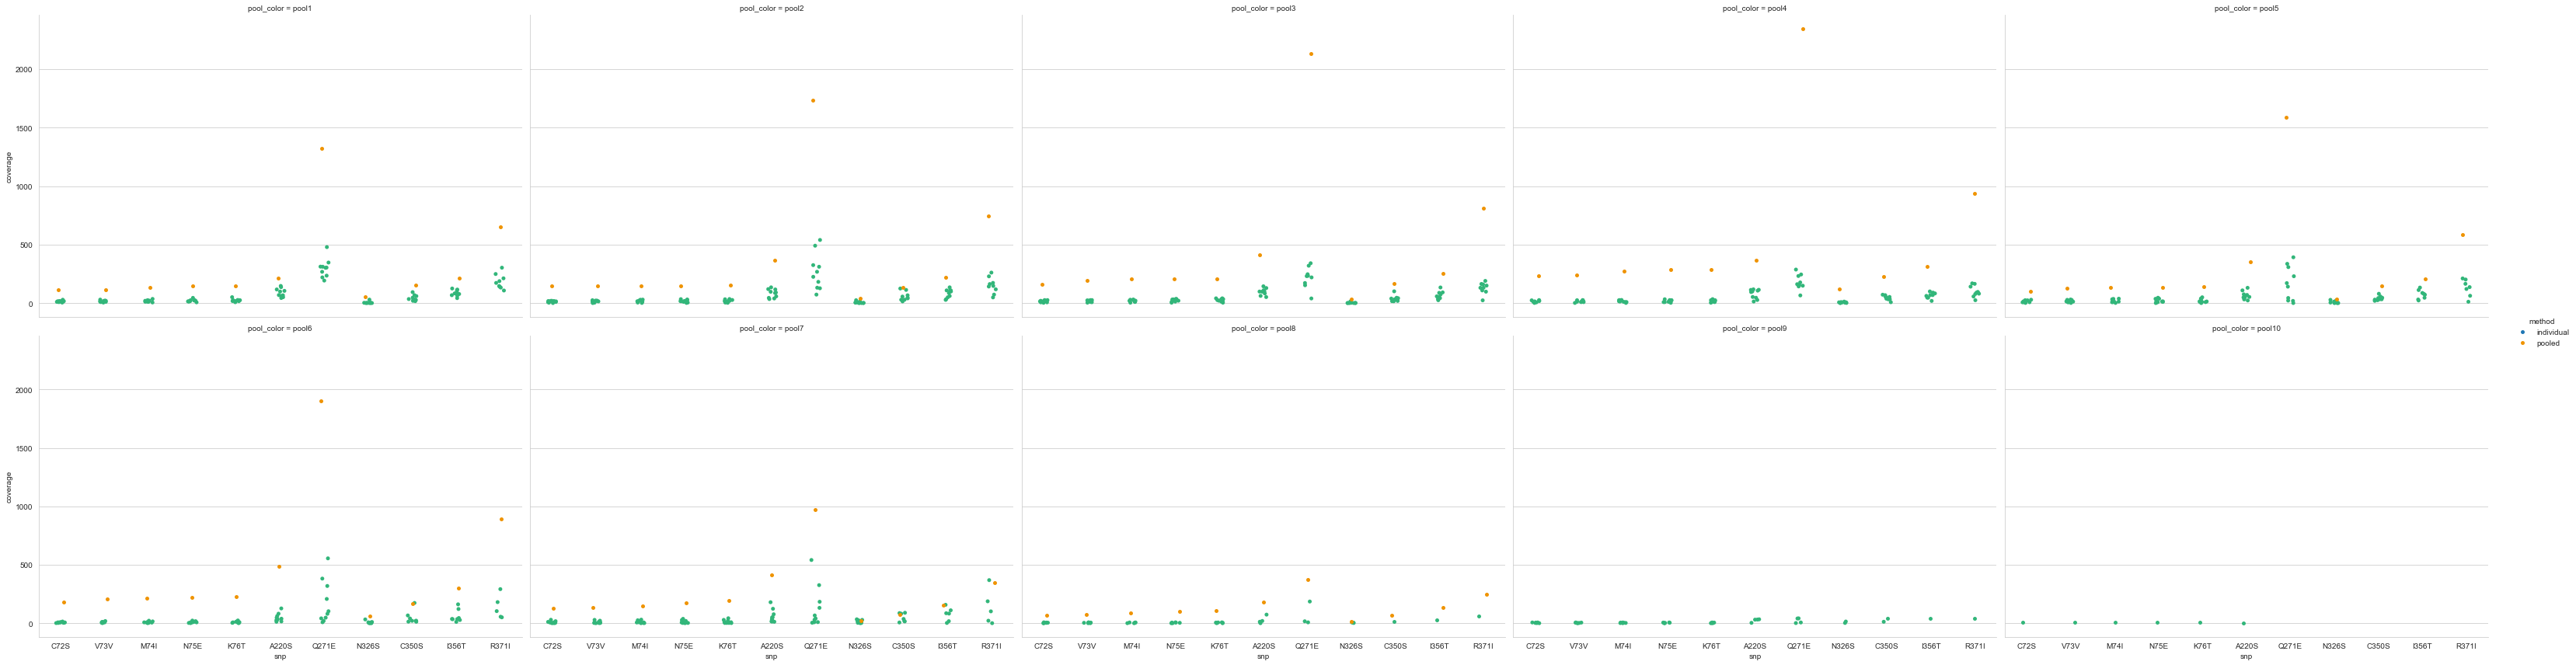

In [12]:
#Individual all SNPs for DHPS

import os
import re
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)


data = {'gene':[], 'coverage':[], 'snp':[], 'method':[], 'Sequences_name':[], 'pool_color':[]}

snp_dhfr_list = ['C72S', 'V73V', 'M74I', 'N75E', 'K76T', 'A220S', 'Q271E', 'N326S', 'C350S', 'I356T', 'R371I']
snp_pos_list =[]
for i in range(len(snp_dhfr_list)):
    test_string = snp_dhfr_list[i]
    snp_position = ''.join(filter(lambda i: i.isdigit(), test_string))
    snp_pos_list.append(int(snp_position))
# print(snp_pos_list)  
    
samples_not_included =[]

cov_directory = r'/Users/mansi/Desktop/Haiti/Individual/Codon_coverage/PfCRT/Coverage_results/avg_cov/'
for filename in os.listdir(cov_directory):
    if re.search(pattern = "^(avg)", string = filename):
        filepath = os.path.join(cov_directory, filename)
        sample_num = filename[4:10].split("P")[0]
#         print(sample_num)
    
        df_dhfr = pd.read_csv(filepath, sep="\t")
        df_codon_pos_list = list(df_dhfr.Codon_pos)
        for i in range(len(snp_dhfr_list)):
            test_string = snp_dhfr_list[i]
            snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
            df_snp_pos = snp_position
            if df_snp_pos in df_codon_pos_list:
                cov_val = df_dhfr.at[df_snp_pos-1, "Codon_coverage"]
                data['coverage'].append(cov_val)
#                 data['sample'].append(sample_num)
                data['gene'].append('crt')
                data['method'].append('individual')
                data['snp'].append(test_string)
                data['Sequences_name'].append(sample_num)
                data['pool_color'].append("")
            else:
                samples_not_included.append(sample_num)
            
#             df_snp_pos = snp_position - 1
#             if df_snp_pos in df_codon_pos_list:
#                 cov_val = df_dhfr.at[df_snp_pos, "Codon_coverage"]
#                 data['coverage'].append(cov_val)
# #                 data['sample'].append(sample_num)
#                 data['gene'].append('crt')
#                 data['method'].append('individual')
#                 data['snp'].append(test_string)
#                 data['Sequences_name'].append(sample_num)
#                 data['pool_color'].append("")
#             else:
#                 samples_not_included.append(sample_num)

# print(data)

snp_df7 = pd.DataFrame(data)

df_ind_dhps3 = snp_df7

# Pooled all SNPs for DHPS

import os
import re
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)


data = {'gene':[], 'coverage':[], 'snp':[], 'method':[], 'Sequences_name':[], 'pool_color':[]}

snp_dhfr_list = ['C72S', 'V73V', 'M74I', 'N75E', 'K76T', 'A220S', 'Q271E', 'N326S', 'C350S', 'I356T', 'R371I']
snp_pos_list =[]
for i in range(len(snp_dhfr_list)):
    test_string = snp_dhfr_list[i]
    snp_position = ''.join(filter(lambda i: i.isdigit(), test_string))
    snp_pos_list.append(int(snp_position))
# print(snp_pos_list)  
    
samples_not_included =[]

cov_directory = r'/Users/mansi/Desktop/Haiti/Pooled/Codon_coverage/PfCRT/Coverage_results/avg_cov/'
for filename in os.listdir(cov_directory):
    if re.search(pattern = "^(avg)", string = filename):
        filepath = os.path.join(cov_directory, filename)
        sample_num = "pool"+str(filename[4:7])#.split("P")[0]
#         print(sample_num)
    
        temp_df_mdr1 = pd.read_csv(filepath, sep="\t")
        df_codon_pos_list = list(temp_df_mdr1.Codon_pos)
        for i in range(len(snp_dhfr_list)):
            test_string = snp_dhfr_list[i]
            snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
            df_snp_pos = snp_position - 1
            if df_snp_pos in df_codon_pos_list:
                cov_val = temp_df_mdr1.at[df_snp_pos, "Codon_coverage"]
                data['coverage'].append(cov_val)
#                 data['sample'].append(sample_num)
                data['gene'].append('crt')
                data['method'].append('pooled')
                data['snp'].append(test_string)
                data['Sequences_name'].append(sample_num)
                data['pool_color'].append("")
            else:
                samples_not_included.append(sample_num)



snp_df8 = pd.DataFrame(data)

df_pool_dhps3 = snp_df8

df_dhps_fin3 = df_ind_dhps3.append(df_pool_dhps3, ignore_index=True)


test_df3 = df_dhps_fin3.set_index('Sequences_name')

# Getting pool ids for each sample from PET excel sheet

import pandas as pd
path = r'/Users/mansi/Desktop/Haiti/Pass_Fail/Haiti_PetValues.xlsx'


df1 = pd.read_excel(path, sheet_name = "CovValidation")
# seq_name_list = list(df1.Sequences_name)

df1_drop = df1.drop(['SPECIES_CT', 'dhfr', 'mdr1', 'dhps', 'crt'], axis = 1)

df1_drop["Sequences_name"] = df1_drop["Sequences_name"].apply(str)

# Using different dfs to get the final df used for plotting
list1 = list(df1_drop.pool)

list2 = list(df1_drop.Sequences_name)

list3 = list(df_dhps_fin3.Sequences_name)



for item3 in list3:
    if item3 in list2:
        index = list2.index(item3)
#         print(item3, index, list1[index])
        test_df3.at[item3, "pool_color"] = list1[index]
    else:
        temp = item3.split("00")
        temp= [''.join(temp[0:2])] 
        n = str(temp).strip("['']")
        test_df3.at[item3, "pool_color"] = n

        
        
# test_sort3 = test_df3.sort_values(by=['pool_color'])
# test_sort3 = test_df3.sort_values(by=['snp'])


sns.set_style("whitegrid")
my_pal = {"pooled":"#ef9300", "individual":"#32b67a"}


g= sns.FacetGrid(test_df3, col = "pool_color", hue="method", col_order = ["pool1", "pool2","pool3","pool4","pool5","pool6","pool7","pool8","pool9", "pool10"], col_wrap = 5, palette = my_pal, height=6, aspect = 1.5)
g.map(sns.stripplot, "snp", "coverage", order = ['C72S', 'V73V', 'M74I', 'N75E', 'K76T', 'A220S', 'Q271E', 'N326S', 'C350S', 'I356T', 'R371I'])
g.add_legend()

plt.show()

outputfile = "/Users/mansi/Desktop/Haiti/Color_by_pool/crt-pool-grid.pdf"
g.fig.savefig(outputfile, bbox_inches='tight')